# THE SPARKS FOUNDATION

## Data Science & Business Analytics Intern [GRIP FEB'21]

**Name:-** Karthikeyan .M.J

- LinkedIn : https://www.linkedin.com/in/karthikeyan-jagadeesan27/

- GitHub profile : https://github.com/Karthikeyan-MJ

**Task-1** >> Prediction Using Supervised ML.

So, for this task, we will be applying Linear Regression for predicting student's percentage based on the number of study hours

**Problem Statement :-** What will be predicted score if a student studies for 9.25 hrs/ day?


**Source of Data :>>** http://bit.ly/w-data

In [1]:
# Load required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

#Plotting Parameters
plt.rcParams['figure.figsize'] = [8,5]

# Load data

In [3]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

# Explore numeric variables - five number summary

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#  Check the dataset for any missing values and print correlation matrix

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


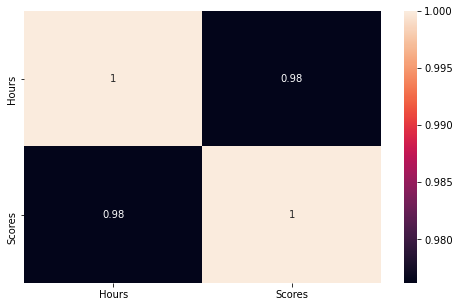

In [10]:
sns.heatmap(df.corr(),annot=True)

**INFERENCE :-**
- The **high correlation** between u and x indicates that the variable u is a good predictor of variable x

# Explore relationships between variables using scatterplots

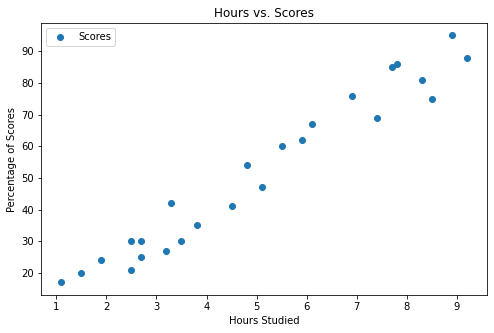

In [12]:
# plotting distribution of Hours vs. Scores
df.plot(x= 'Hours', y='Scores', style = 'o')
plt.title('Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Scores')
plt.show()

**Inference :-**
- We can clearly observe a stong linear relationship between the both of two variables and can imagine a straight line, making them ideal for Linear Regression application.

In [14]:
#In this stage dividing dataset into features and labels
x1 = df.iloc[:,0].values
y1 = df.iloc[:,1].values

In [15]:
# And reshaping the data, so it will fit into model.
x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

# Split data into train, test sets

- Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.
- Check: train_test_split function

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("X-Train :",x_train.shape)
print("X-Test :",x_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (20, 1)
X-Test : (5, 1)
Y-Train : (5, 1)
Y-Test : (5, 1)


# Train the model

In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)


LinearRegression()

# Training set result by plotting regression line.

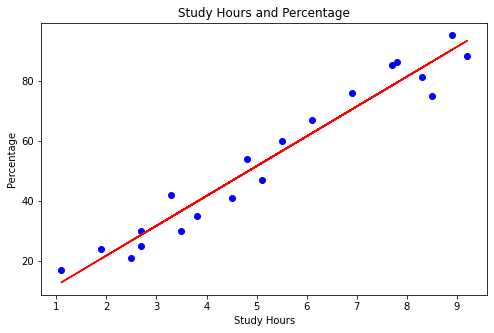

In [18]:

plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, LR.predict(x_train), color = 'red')
plt.title('Study Hours and Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [19]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                    6.12e-21
Time:                        18:53:51   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.2251      0.223     45.950      0.000       9.759      10.691
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.529
Skew:                          -0.410   Prob(JB):                        0.466
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Predicting scores for model
prediction = LR.predict(x_test)
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

# Model Evaluation

- As we are dealing with the numerical data, Mean absolute error would be a great choice metric for evaluating Linear Regression model

In [21]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: >> ',mean_absolute_error(y_test, prediction))

Mean Absolute Error: >>  4.183859899002975


In [22]:
# Solution

hours = np.array(9.25)
hours = hours.reshape(-1, 1)
prediction_for_score = LR.predict(hours)
print('If the student studies for 9.25 hours, he is expected to score',prediction_for_score,'marks.')


If the student studies for 9.25 hours, he is expected to score [[93.69173249]] marks.


**INFERENCE :-**
- After successful model building and the predictions on test data, we can conclude that."If a student studies for 9.25 hours/day, he is expected to score **`93.69 marks`** respectively.